# i. Perkenalan

---

Nama : Afi

Objective : Melakukan inferensi dengan menggunakan model terbaik yang telah dilatih sebelumnya, guna memprediksi jenis kendaraan pada gambar baru yang tidak termasuk dalam train-set, val-set, maupun test-set.

---

# ii. Import Libraries

In [6]:
# TensorFlow and Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Visualization
import matplotlib.pyplot as plt

# Data Manipulation and Processing
import numpy as np
import json
import os
from PIL import Image

Import library yang diperlukan.

# iii. Load Model dan Label Mapping

In [7]:
# Path model dan label mapping
model_path = "./best_model_mobilenetv2.h5"
label_path = "./label_mapping.json"

# Load model
model = load_model(model_path)

# Load label mapping
with open(label_path, "r") as file:
    labels = json.load(file)

print("Model dan label mapping berhasil dimuat.")

Model dan label mapping berhasil dimuat.


Berhasil memuat model dan label.

# iv. Load Gambar untuk Inference

In [8]:
# Path folder gambar
image_folder = "./sample_images"

# Ambil semua file gambar di folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Periksa file gambar yang ditemukan
print("Gambar yang ditemukan:", image_files)

Gambar yang ditemukan: ['./sample_images\\bus 1.jpg', './sample_images\\bus 2.jpg', './sample_images\\bus 3.jpg', './sample_images\\bus 4.jpg', './sample_images\\car 1.jpg', './sample_images\\car 2.jpg', './sample_images\\car 3.jpg', './sample_images\\car 4.jpg', './sample_images\\motorcycle 1.jpg', './sample_images\\motorcycle 2.jpg', './sample_images\\motorcycle 3.jpg', './sample_images\\motorcycle 4.jpg', './sample_images\\truck 1.jpg', './sample_images\\truck 2.jpg', './sample_images\\truck 3.jpg', './sample_images\\truck 4.jpg']


Menampilkan daftar lengkap file gambar yang ditemukan di folder sample_images.

# v. Prediksi Gambar

In [9]:
for img_path in image_files:
    # Load gambar
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = labels[str(predicted_class)]

    # Tampilkan hasil
    print(f"Gambar: {img_path}")
    print(f"Prediksi: {predicted_label}\n")


1/1 [==============================] - 2s 2s/step
Gambar: ./sample_images\bus 1.jpg
Prediksi: Car

1/1 [==============================] - 0s 47ms/step
Gambar: ./sample_images\bus 2.jpg
Prediksi: Car

1/1 [==============================] - 0s 49ms/step
Gambar: ./sample_images\bus 3.jpg
Prediksi: Car

1/1 [==============================] - 0s 47ms/step
Gambar: ./sample_images\bus 4.jpg
Prediksi: Car

1/1 [==============================] - 0s 58ms/step
Gambar: ./sample_images\car 1.jpg
Prediksi: Bus

1/1 [==============================] - 0s 47ms/step
Gambar: ./sample_images\car 2.jpg
Prediksi: Bus

1/1 [==============================] - 0s 43ms/step
Gambar: ./sample_images\car 3.jpg
Prediksi: Bus

1/1 [==============================] - 0s 59ms/step
Gambar: ./sample_images\car 4.jpg
Prediksi: Bus

1/1 [==============================] - 0s 46ms/step
Gambar: ./sample_images\motorcycle 1.jpg
Prediksi: Motorcycle

1/1 [==============================] - 0s 52ms/step
Gambar: ./sample_images\mot

Model sudah cukup baik dalam mengenali kategori seperti motorcycle dan truck. Namun, model perlu ditingkatkan untuk membedakan bus dan car.

# vi. Visualisasi Hasil

1/1 [==============================] - 0s 46ms/step


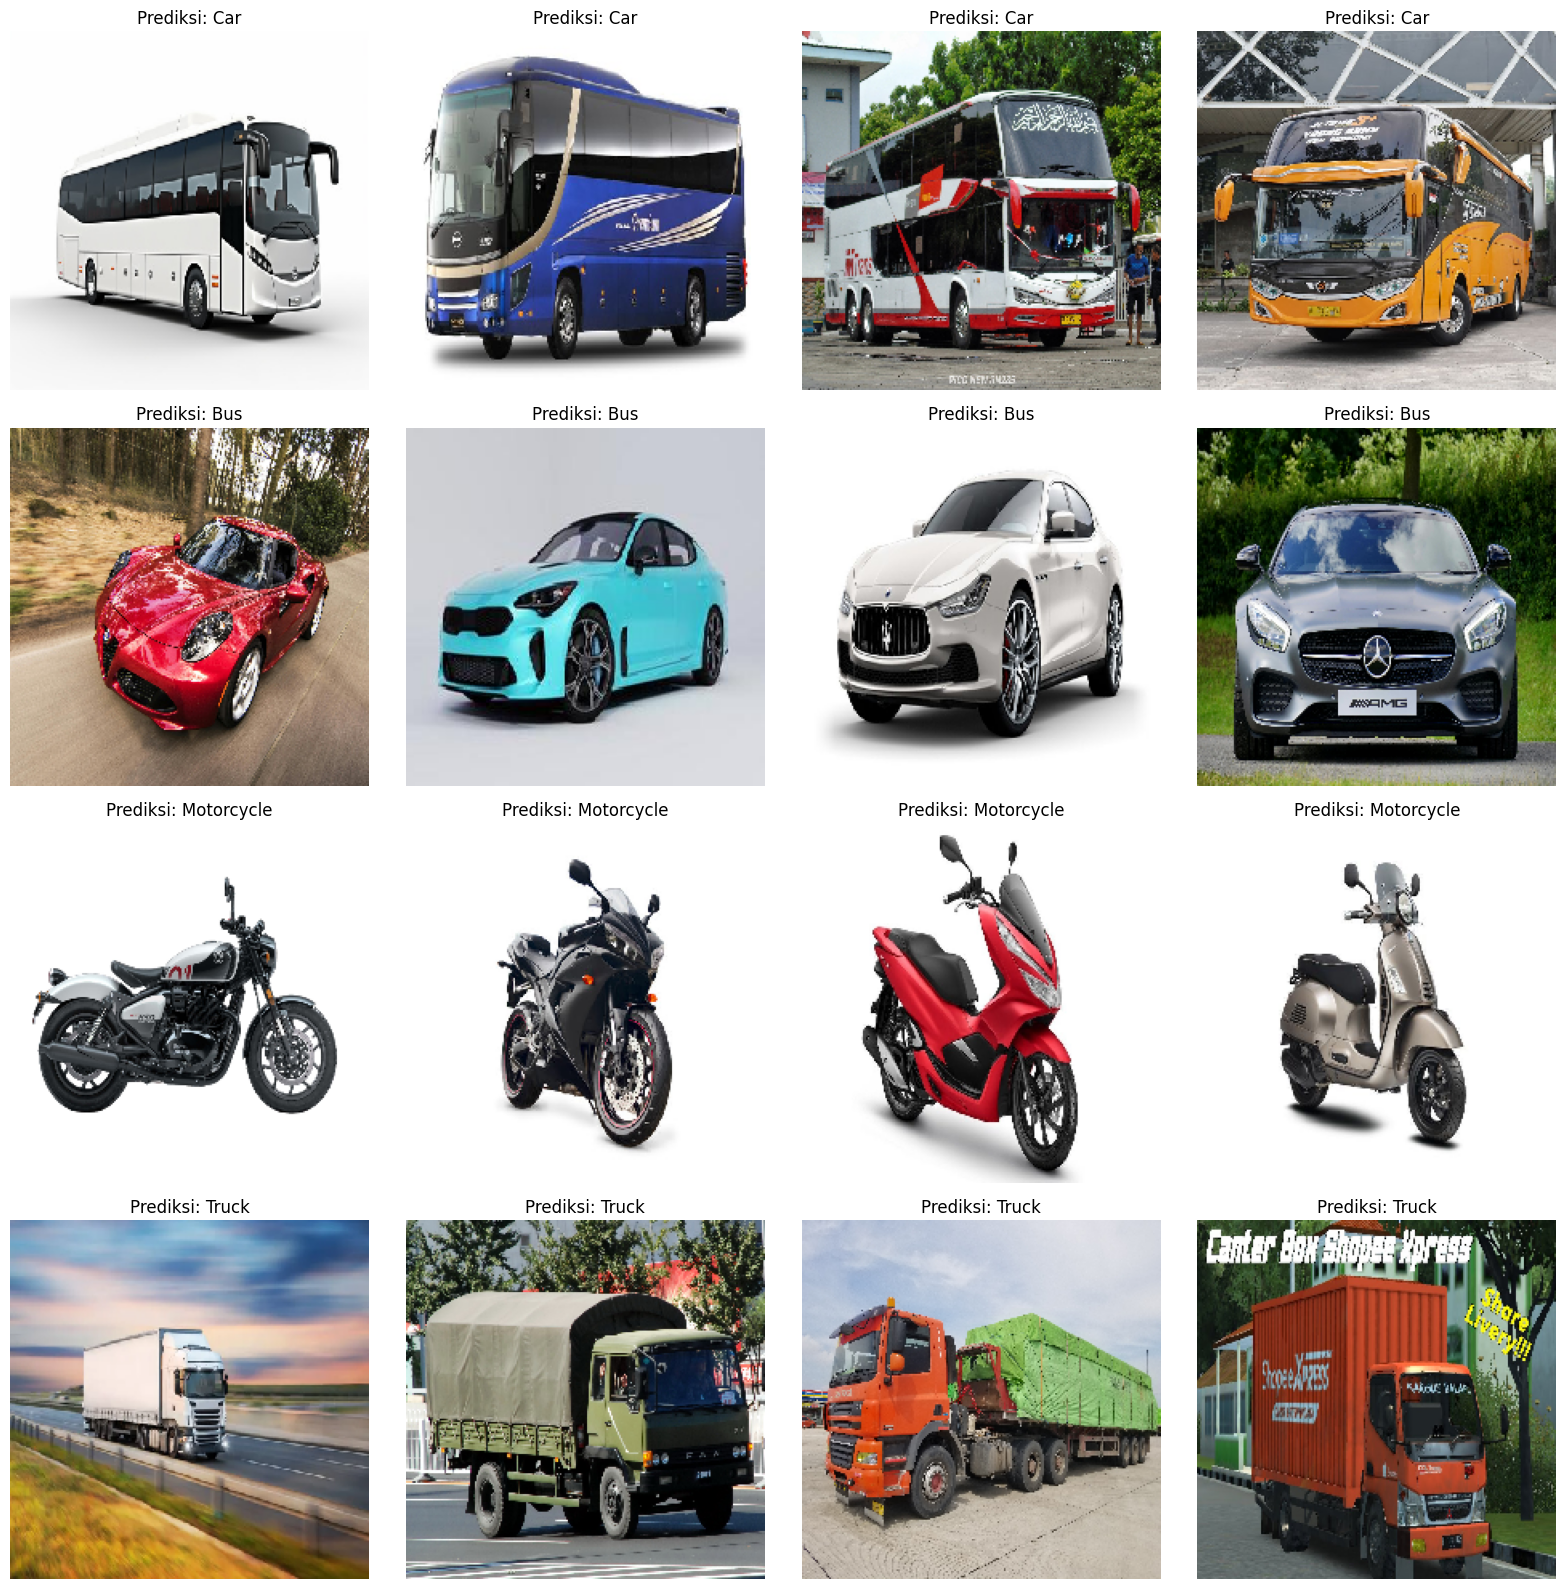

In [11]:
# Menampilkan gambar dan prediksi dalam grid
columns = 4  # Jumlah kolom
rows = -(-len(image_files) // columns)  # Hitung jumlah baris secara otomatis

fig, axes = plt.subplots(rows, columns, figsize=(columns * 4, rows * 4))
axes = axes.flatten()

for i, img_path in enumerate(image_files):
    img = image.load_img(img_path, target_size=(224, 224))
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Prediksi: {labels[str(np.argmax(model.predict(np.expand_dims(image.img_to_array(img) / 255.0, axis=0)), axis=1)[0])]}")

for j in range(i + 1, len(axes)):  # Hilangkan sumbu kosong jika grid lebih besar dari jumlah gambar
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Model cukup baik dalam mengenali kategori "Motorcycle" dan "Truck". Namun, model menghadapi tantangan dalam membedakan kategori "Bus" dan "Car".

# vii. Kesimpulan

- Model telah diuji menggunakan gambar baru dari folder `sample_images` dan menunjukkan performa yang baik, terutama pada kategori "Motorcycle" dan "Truck" dengan prediksi yang akurat.
- Namun, terdapat kesalahan prediksi pada kategori "Bus" dan "Car", di mana beberapa gambar mobil terprediksi sebagai bus, dan sebaliknya, bus terprediksi sebagai mobil.
- Kemungkinan penyebab kesalahan ini adalah fitur visual yang mirip antara mobil dan bus, seperti bentuk besar atau desain tertentu yang menyerupai bus. Selain itu, variasi dalam dataset pelatihan yang kurang beragam juga dapat menjadi faktor penyebab.
- Dikarenakan model dilatih pada dataset kecil, kesalahan semacam ini masih dianggap wajar, namun penting untuk terus meningkatkan akurasi model melalui augmentasi data atau fine-tuning lebih lanjut.
- Secara keseluruhan, model memiliki performa yang cukup baik dengan akurasi tinggi dan siap digunakan untuk deployment tahap awal.